In [1]:
import numpy as np
import pandas as pd
import math
from scipy import stats

In [4]:
#train = pd.read_csv('train.csv')
# train.info()
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [29]:
#type(train)
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [16]:
train.shape

(1460, 81)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

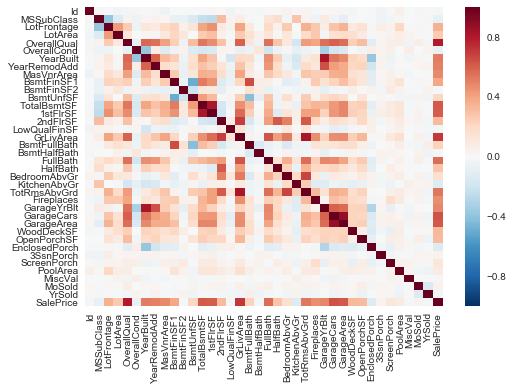

In [6]:
# Verify correlation
sns.heatmap(data=train.corr())
plt.show()
plt.gcf().clear()

In [7]:
# Check for skews
train.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

In [9]:
# turn the categorical data into dummy variables
#train_01 = train.copy()
train_01 = pd.get_dummies(train_01)

In [10]:
# The data types for the dummy variables GarageCond_TA are now uint8.
#train_01
train_01.dtypes

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,0,0,0,1,0,0,0,0,1,0
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,0,0,0,1,0,0,0,0,1,0
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,0,0,0,1,0,0,0,0,1,0
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,0,0,0,1,1,0,0,0,0,0
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,0,0,1,0,0,0,0,1,0


In [42]:
#  remove the original categorical variables (these will cause our SKLearn to spew out errors if left in)
#keep_cols = train_01.select_dtypes(include=['number']).columns
len(keep_cols)


290

In [34]:
train_01['LotFrontage'].dtype


dtype('float64')

In [35]:
train_01 = train_01[keep_cols]

In [39]:
train_01.shape

(1460, 290)

In [40]:
train_01.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('uint8')], dtype=object)

In [45]:
train_01.isnull().sum()

Id                         0
MSSubClass                 0
LotFrontage              259
LotArea                    0
OverallQual                0
OverallCond                0
YearBuilt                  0
YearRemodAdd               0
MasVnrArea                 8
BsmtFinSF1                 0
BsmtFinSF2                 0
BsmtUnfSF                  0
TotalBsmtSF                0
1stFlrSF                   0
2ndFlrSF                   0
LowQualFinSF               0
GrLivArea                  0
BsmtFullBath               0
BsmtHalfBath               0
FullBath                   0
HalfBath                   0
BedroomAbvGr               0
KitchenAbvGr               0
TotRmsAbvGrd               0
Fireplaces                 0
GarageYrBlt               81
GarageCars                 0
GarageArea                 0
WoodDeckSF                 0
OpenPorchSF                0
                        ... 
GarageCond_TA              0
PavedDrive_N               0
PavedDrive_P               0
PavedDrive_Y  

In [47]:
# replace all NAs with the means: this is just for comparison, will be replace with a better imputation later on.
train_01 = train_01.fillna(train_01.mean())

In [48]:
train_01.isnull().sum()

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
                        ..
GarageCond_TA            0
PavedDrive_N             0
PavedDrive_P             0
PavedDrive_Y             0
PoolQC_Ex                0
PoolQC_Fa                0
P

In [49]:
train_01

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.000000,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.000000,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.000000,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.000000,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.000000,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
5,6,50,85.000000,14115,5,5,1993,1995,0.0,732,...,0,0,0,1,0,0,0,0,1,0
6,7,20,75.000000,10084,8,5,2004,2005,186.0,1369,...,0,0,0,1,0,0,0,0,1,0
7,8,60,70.049958,10382,7,6,1973,1973,240.0,859,...,0,0,0,1,0,0,0,0,1,0
8,9,50,51.000000,6120,7,5,1931,1950,0.0,0,...,0,0,0,1,1,0,0,0,0,0
9,10,190,50.000000,7420,5,6,1939,1950,0.0,851,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
# Dummify categorical varibles in test dataset also and replace missing values for test data set also. Will seek further advice on whether this is appropriate.


In [50]:
test = pd.read_csv('test.csv')

In [51]:
test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

In [52]:
test_01 = test.copy()
test_01 = pd.get_dummies(test_01)

In [53]:
test_01 = test_01.fillna(test_01.mean())

In [ ]:
# The below dummy variables exist in train but not test; create them in the test set and set to zero.

In [54]:
for col in keep_cols:
    if col not in test_01:
        print(col)

SalePrice
Utilities_NoSeWa
Condition2_RRAe
Condition2_RRAn
Condition2_RRNn
HouseStyle_2.5Fin
RoofMatl_ClyTile
RoofMatl_Membran
RoofMatl_Metal
RoofMatl_Roll
Exterior1st_ImStucc
Exterior1st_Stone
Exterior2nd_Other
Heating_Floor
Heating_OthW
Electrical_Mix
GarageQual_Ex
PoolQC_Fa
MiscFeature_TenC


In [55]:
for col in keep_cols:
    if col not in test_01:
        test_01[col] = 0

In [59]:
test_01 = test_01[keep_cols]

In [60]:
test_01.shape

(1459, 290)

In [ ]:
# Create a model now

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# Split the train data set for training and testing (80 - 20 %)

In [64]:
train_s1 = train_01.sample(frac=0.8,random_state=200)
test_s1 = train_01.drop(train_s1.index)
# Remember to experiment with different random_state parameters later to optimize accuracies

In [65]:
len(train_s1)

1168

In [66]:
len(test_s1)

292

In [62]:
rf_test = RandomForestRegressor(max_depth=30, n_estimators=500, max_features = 100, oob_score=True, random_state=1234)

In [69]:
rf_test

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features=100, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=True, random_state=12345, verbose=0, warm_start=False)

In [67]:
cv_score = cross_val_score(rf_test, train_s1.drop('SalePrice', axis = 1), train_s1['SalePrice'], cv = 5, n_jobs = -1)

In [68]:
print('CV Score is: '+ str(np.mean(cv_score)))

CV Score is: 0.860665450927


In [73]:
train.LotFrontage

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
7         NaN
8        51.0
9        50.0
10       70.0
11       85.0
12        NaN
13       91.0
14        NaN
15       51.0
16        NaN
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
24        NaN
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
        ...  
1430     60.0
1431      NaN
1432     60.0
1433     93.0
1434     80.0
1435     80.0
1436     60.0
1437     96.0
1438     90.0
1439     80.0
1440     79.0
1441      NaN
1442     85.0
1443      NaN
1444     63.0
1445     70.0
1446      NaN
1447     80.0
1448     70.0
1449     21.0
1450     60.0
1451     78.0
1452     35.0
1453     90.0
1454     62.0
1455     62.0
1456     85.0
1457     66.0
1458     68.0
1459     75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [72]:
train.LotFrontage.isnull().sum() # Number of NAs in LotFrontage

259

In [70]:
train_02 = train.copy()  #  The LotFrontage will be set to zero in this dataset copy.

In [ ]:
null_index = train_02.LotFrontage.isnull()
train_02.loc[null_index,'LotFrontage'] = 0

In [71]:
train_02.LotFrontage

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
7         NaN
8        51.0
9        50.0
10       70.0
11       85.0
12        NaN
13       91.0
14        NaN
15       51.0
16        NaN
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
24        NaN
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
        ...  
1430     60.0
1431      NaN
1432     60.0
1433     93.0
1434     80.0
1435     80.0
1436     60.0
1437     96.0
1438     90.0
1439     80.0
1440     79.0
1441      NaN
1442     85.0
1443      NaN
1444     63.0
1445     70.0
1446      NaN
1447     80.0
1448     70.0
1449     21.0
1450     60.0
1451     78.0
1452     35.0
1453     90.0
1454     62.0
1455     62.0
1456     85.0
1457     66.0
1458     68.0
1459     75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [74]:
train_02 = pd.get_dummies(train_02) 
# Repeat data cleaning and imputation like in first trial. N.B: These steps will be performed several times in the project.

In [76]:
keep_cols = train_02.select_dtypes(include=['number']).columns # May skip this since list exists from previous execution
train_02 = train_02[keep_cols]

In [78]:
train_02 = train_02.fillna(train_02.mean())

In [79]:
# Split the train data set for training and testing (80 - 20 %)
train_s2 = train_02.sample(frac=0.8,random_state=200)
test_s2 = train_02.drop(train_s2.index)


In [80]:
rf_test = RandomForestRegressor(max_depth=30, n_estimators=500, max_features = 100, oob_score=True, n_jobs=-1, random_state=1234)
cv_score = cross_val_score(rf_test, train_s2.drop('SalePrice', axis = 1), train_s2['SalePrice'], cv = 5, n_jobs=-1)

In [81]:
print('CV Score is: '+ str(np.mean(cv_score)))

CV Score is: 0.858926250345


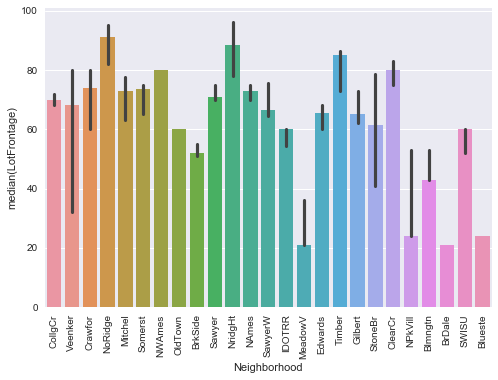

In [84]:
sns.barplot(data=train,x='Neighborhood',y='LotFrontage', estimator=np.median)
plt.xticks(rotation=90)
plt.show()
#plt.gcf().clear()

In [85]:
gb_neigh_LF = train['LotFrontage'].groupby(train['Neighborhood'])

In [86]:
train_LFm = train.copy()

In [87]:
# for the key (the key is neighborhood in this case), and the group object (group is LotFrontage grouped by Neighborhood) 
# associated with it...
for key,group in gb_neigh_LF:
    # find where we are both simultaneously missing values and where the key exists
    lot_f_nulls_nei = train['LotFrontage'].isnull() & (train['Neighborhood'] == key)
    # fill in those blanks with the median of the key's group object
    train_LFm.loc[lot_f_nulls_nei,'LotFrontage'] = group.median()

In [88]:
train_LFm = pd.get_dummies(train_LFm)

In [89]:
keep_cols = train_LFm.select_dtypes(include=['number']).columns
train_LFm = train_LFm[keep_cols]

In [90]:
train_LFm = train_LFm.fillna(train_LFm.mean())

In [91]:
# Split the train data set for training and testing (80 - 20 %)
train_s3 = train_LFm.sample(frac=0.8,random_state=200)
test_s3 = train_LFm.drop(train_s3.index)

In [92]:
rf_test = RandomForestRegressor(max_depth=30, n_estimators=500, max_features = 100, oob_score=True, n_jobs=-1, random_state= 1234)
cv_score = cross_val_score(rf_test, train_s3.drop('SalePrice', axis = 1), train_s3['SalePrice'], cv = 5, n_jobs=-1)

In [93]:
print('CV Score is: '+ str(np.mean(cv_score)))

CV Score is: 0.858457973424


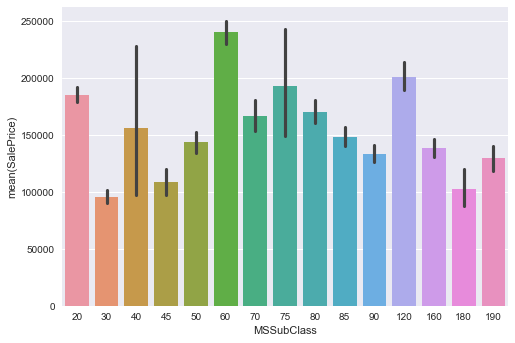

In [94]:
sns.barplot(data=train, x='MSSubClass', y='SalePrice')
plt.show()
plt.gcf().clear()

In [95]:
from statistics import mode

In [96]:
low_var_cat = [col for col in train.select_dtypes(exclude=['number']) if 1 - sum(train[col] == mode(train[col]))/len(train) < 0.03]
low_var_cat

['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating']

In [ ]:
has_rank = [col for col in train if 'TA' in list(train[col])]


In [ ]:
dic_num = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler